Load Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator

# from tensorflow.keras.utils import array_to_img, img_to_array, load_img

Load Data

In [2]:
def load_data(path):

    data = pd.read_csv(path)
    return data

train_df = load_data('Train.csv')
train_df.head()

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021


Data Understanding

In [3]:
def check_col(data):

    col = data.columns
    return col

check_col(train_df)

Index(['ID', 'filename', 'growth_stage', 'damage', 'extent', 'season'], dtype='object')

In [4]:
def check_shape_info(data):

    print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")
    print("**********************************************************************")
    print(data.info())

check_shape_info(train_df)

The dataset contains 26068 rows and 6 columns
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26068 entries, 0 to 26067
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            26068 non-null  object
 1   filename      26068 non-null  object
 2   growth_stage  26068 non-null  object
 3   damage        26068 non-null  object
 4   extent        26068 non-null  int64 
 5   season        26068 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None


In [5]:
def descriptive_analysis(data, col):

    descriptive_analysis = data[col]
    return descriptive_analysis.describe()

col = ['extent']
descriptive_analysis(train_df, col)

,extent
count,26068.000000
mean,7.096056
std,18.613229
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [6]:
def tally_responses(data, col):

    unique_response = data[col].value_counts()
    return unique_response

col = ['growth_stage']
tally_responses(train_df, col)

growth_stage
V               10015
M                6664
F                6164
S                3225
dtype: int64

In [7]:
col = ['damage']
tally_responses(train_df, col)

damage
G         11623
WD         9238
DR         4516
ND          272
PS          254
DS          115
WN           37
FD           13
dtype: int64

In [8]:
col = ['season']
tally_responses(train_df, col)

season
SR2021    9927
LR2021    7945
SR2020    6163
LR2020    2033
dtype: int64

## Data Cleaning  

In [9]:
def missing(df):
    #missing values
    missing_values = df.isnull().sum()
    
    #duplicate
    duplicates = df.duplicated().sum()
    
    return(duplicates)

    
missing(train_df)
#outliers 


0

In [10]:
# train_df.plot.box('extent')

In [11]:
train_df.extent.value_counts().sort_values(ascending=False)

0      21558
10       729
30       727
40       696
20       690
50       445
60       388
90       300
80       291
70       199
100       45
Name: extent, dtype: int64

In [12]:
mean = np.mean(train_df['extent'])
std = np.std(train_df['extent'])
print('mean of the dataset is', mean)
print('std. deviation is', std)
threshold = 3
outlier = []
for i in train_df['extent']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
#print('outlier in dataset is', outlier)

mean of the dataset is 7.096056467699862
std. deviation is 18.61287150126672


In [13]:
type(outlier)

list

In [14]:
# outlier.sort_values(by = 'outlier', ascending=False)

In [15]:
# outlier.columns=['outlier']

In [16]:
# outlier.plot.box('outlier')

In [17]:
"""def outliers(data, threshold=3):
    z_score = data(data - data.mean()) / data.std()
    outliers = """

'def outliers(data, threshold=3):\n    z_score = data(data - data.mean()) / data.std()\n    outliers = '

In [18]:
train_df[train_df['extent' ] >= 70].sort_values(by='extent').head(30)

,ID,filename,growth_stage,damage,extent,season
41,ID_L3YYRSTAP8,L134F00762C01S05370Rp14099.jpg,M,DR,70,SR2020
12807,ID_BYI3EN5G0H,L131F03896C01S01628Rp14769.jpg,M,DR,70,SR2020
12792,ID_QYNEVRH9VU,L222F01109C01S03762Rp14789.jpg,M,DR,70,SR2020
12771,ID_1WE68UZB5E,L1116F02814C39S11846Rp41275.jpg,M,DR,70,SR2021
12756,ID_3D1M164W3A,201_repeat_2_1382_6393_4759.JPG,M,DR,70,LR2020
12496,ID_HINHZ4AYCE,L1095F00444C39S12039Rp43714.jpg,M,DR,70,SR2021
12315,ID_3L3MNX2GLO,21_repeat_2_1361_6009_4370.JPG,M,DR,70,LR2020
12195,ID_Q6VUY9C2ZC,L429F01858C01S02065Rp13273.jpg,M,DR,70,SR2020
12002,ID_56M7GHWF31,L144F00512C01S07633Rp30712.jpg,M,DR,70,LR2021
11972,ID_EK9VBT298G,158_repeat_2_1490_5508_3885.JPG,M,DR,70,LR2020


### EDA Summary 

## Exploratory Data Analysis

In [19]:
train_df.head()

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021


## Distribution of Data 

In [55]:
plt.style.use('fivethirtyeight')

In [56]:
def hist_plot(col):
    
    plt.hist(col, edgecolor = 'black', color = 'orange', log = True);
    plt.title("Histogram Showing Distribution")
    plt.xlabel('Extent of Damage')
    plt.ylabel('Count')    

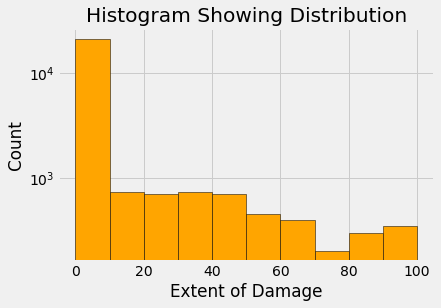

In [57]:
col = train_df['extent']
hist_plot(col)

## Observation

1. The data is positively skewed 

In [22]:
def bar_plot(x, y):
    
    plt.bar(x, y, color = 'green', edgecolor = 'black')
    plt.title('Bar Plot Showing Damage type against Extent')
    plt.xlabel('Damage Type')
    plt.ylabel('Extent of Damage')

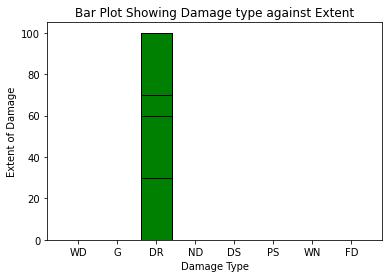

In [23]:
x = train_df['damage']
y = train_df['extent']

bar_plot(x, y)

In [47]:
## Observation
#1. Drought Damaged crops had the most dire effects / greatest extent damage on crops 

In [49]:
def plot_pie_chart(unique_counts, labels):
    
    plt.pie(unique_counts, startangle=45, shadow = True, labels = labels, autopct = '%1.1f%%')
    plt.title('Pie Chart')
    plt.show()
    

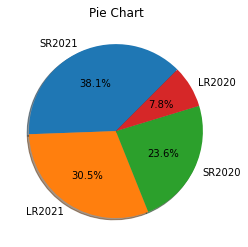

In [50]:
seasons_counts = train_df['season'].value_counts()
unique_counts = seasons_counts.values # values attribute of a pandas series 
labels = seasons_counts.index

plot_pie_chart(unique_counts, labels)

## Observations 
1. a great amount of data was collected during the long rain season in 2021 and during the short rain seaso season in 2021 

In [79]:
def horizontal_bar(counts):
    
    sorted_counts = counts.sort_values(ascending=True)
    sorted_counts.plot.barh(width = 0.5, log = True, edgecolor = 'black')
    plt.title('Damage Horizontal Bar')
    plt.xlabel('Counts')
    plt.ylabel('Damage Type')

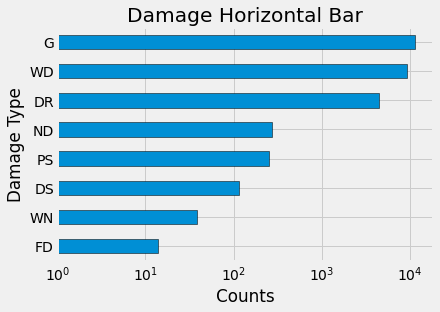

In [81]:
damage_counts = train_df['damage'].value_counts()
horizontal_bar(damage_counts)

*Note*
1. next visualization will require comparison between two or more columns 

#### Grouping Columns 

In [25]:
train_df

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021
...,...,...,...,...,...,...
26063,ID_3II1SXC0ZO,L1084F03259C39S12149Rp41671.jpg,M,DR,30,SR2021
26064,ID_OE7OU9ZF4U,L406F04369C01S07190Rp22847.jpg,V,G,0,LR2021
26065,ID_20M531UIZZ,L134F00766C01S09784Rp26034.jpg,M,G,0,LR2021
26066,ID_BZBV2FH0KL,L1153F02464C01S00194Rp01561.jpg,F,G,0,SR2020


In [26]:
train_df.growth_stage.value_counts()

V    10015
M     6664
F     6164
S     3225
Name: growth_stage, dtype: int64

sowing
maturity
flowering
vegetative 

drought 
WD-weed
good 
disease
flood
nutrient deficiency
pest
WN wind 

shortrains
longrains 

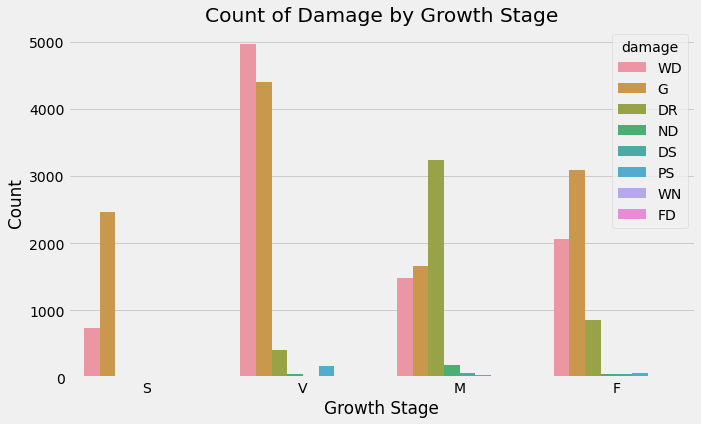

In [86]:
#relationship between groethstage and damage 
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='growth_stage', hue='damage')
plt.xlabel('Growth Stage')
plt.ylabel('Count')
plt.title('Count of Damage by Growth Stage')
plt.show()

###### Above Observation
Maize farms are not being weeded during the vegetative stage which has the highest count 
During maturity stage drought affects most plants with the highest count 

In all the Growth stages the most consistent Damage is WeedDamage 

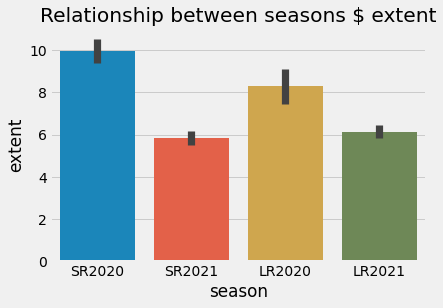

In [88]:
#relationship between season and extent
sns.barplot(data=train_df, x='season', y='extent')
plt.title('Relationship between seasons $ extent')
plt.show()

##### Above Observation 
For shortrains 2020 the extent damage had the highest count could be there was shortage of water  

In [94]:
#
#plt.figure(figsize=(10, 6))
#sns.countplot(data=train_df, x='extent', hue='damage', log=True)
#plt.xlabel('extent')
#plt.ylabel('damage')
#plt.show()

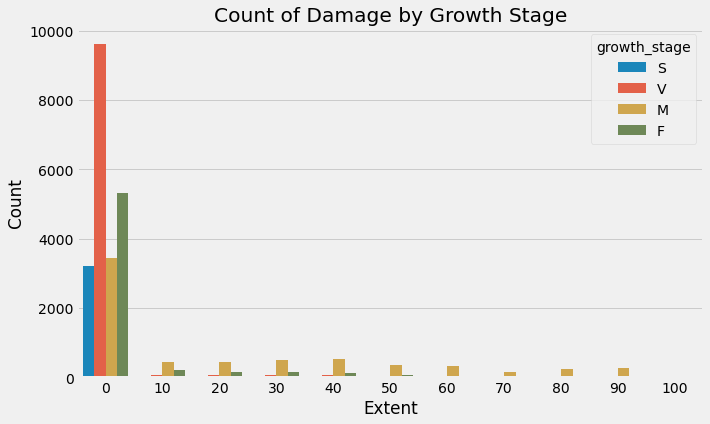

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='extent', hue='growth_stage')
plt.xlabel('Extent')
plt.ylabel('Count')
plt.title('Count of Damage by Growth Stage')
plt.show()

###### Above Observation
During maturity stage is when we see most plants are damaged.